# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [26]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
# Download necessary NLTK data
import nltk
from jupyter_core.version import pattern

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mateo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mateo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Load and display the data


In [27]:
# Define the path to the manually downloaded dataset
data_path = "data/data.csv"  # Update the file name if it's different

# Check if the file exists before attempting to load
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Dataset file not found at {data_path}. Ensure the file is in the correct location.")

# Load the dataset
df= pd.read_csv(data_path)
print("Dataset loaded successfully!")

# Display the first few rows of the DataFrame
df.head()


Dataset loaded successfully!


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


# Drop the neutral class

In [28]:
# Assuming the sentiment labels are stored in a column named 'sentiment'
sentiment_column = 'Sentiment'  # Replace with the actual column name in your dataset

# Check the unique values in the sentiment column to confirm the presence of 'neutral'
print("Unique sentiment labels before filtering:", df[sentiment_column].unique())

# Drop rows where sentiment is 'neutral'
df_filtered = df[df[sentiment_column] != 'neutral']

# Display the first few rows of the filtered DataFrame
print("Dataset after dropping the 'neutral' class:")
df_filtered.head()

# Optionally, save the filtered dataset to a new CSV file
filtered_data_path = "data/filtered_data.csv"  # Update as needed
df_filtered.to_csv(filtered_data_path, index=False)
print(f"Filtered dataset saved to {filtered_data_path}")


Unique sentiment labels before filtering: ['positive' 'negative' 'neutral']
Dataset after dropping the 'neutral' class:
Filtered dataset saved to data/filtered_data.csv


# Use the new dataset that is generated


In [29]:
data_path = "data/filtered_data.csv"  # Update the file name if it's different
# Load the dataset
df= pd.read_csv(data_path)
print("Dataset loaded successfully!")

# Display the first few rows of the DataFrame
df.head()



Dataset loaded successfully!


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,$SPY wouldn't be surprised to see a green close,positive
4,Shell's $70 Billion BG Deal Meets Shareholder ...,negative


# Perfrom EDA on the dataset to understand the distribution of classes

Class distribution:
Sentiment
positive    1852
negative     860
Name: count, dtype: int64

Text length stats:
count    2712.000000
mean      109.992257
std        55.073596
min        10.000000
25%        67.000000
50%        98.000000
75%       140.000000
max       298.000000
Name: text_length, dtype: float64


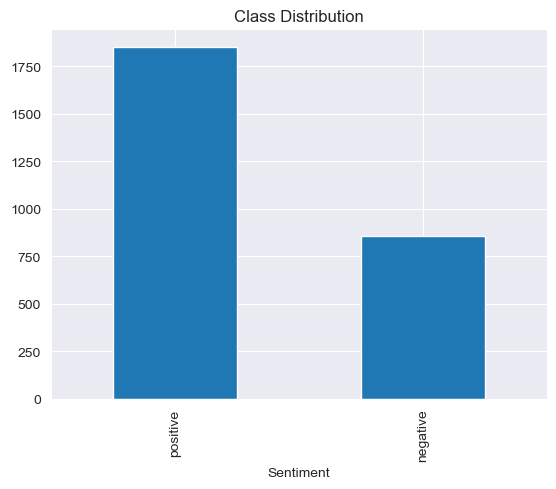

In [30]:
# Perform Exploratory Data Analysis (EDA)
def perform_eda(data):
    # Check class distribution
    print("Class distribution:")
    print(df['Sentiment'].value_counts())

    # Text length analysis
    df['text_length'] = df['Sentence'].apply(len)
    print("\nText length stats:")
    print(df['text_length'].describe())

    # Visualize class distribution
    df['Sentiment'].value_counts().plot(kind='bar', title="Class Distribution")
    plt.show()
perform_eda(df)

# Preprocess the text data
In this section we will preprocess the text data by performing the following steps:
1. Remove extra whitespaces
2. Remove HTML tags
3. Remove URLs
4. Decode HTML entities
5. Replace stock tickers (e.g., $AAPL) with a special token 'STOCK'
6. Handle currencies (e.g., $10k, €20)
7. Remove space between digits and decimal points
8. Remove space before or after a comma in large numbers
9. Ensure that numbers with units (e.g., EUR 1.6 m) have no spaces
10. Replace percentages
11. Replace months, dates, years, and hours
12. Remove special characters
13. Tokenize the text
14. Remove punctuation
15. Remove stopwords
16. Apply lemmatization
17. Join tokens back into text

In [31]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import html
import string

# Download necessary NLTK resources if not already done
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_and_stem(text):
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', 'url', text)

    # Decode HTML entities
    text = html.unescape(text)

    # Replace stock tickers with 'STOCK'
    text = re.sub(r'\$[A-Za-z]+', 'STOCK', text)

    # Handle cases with currencies like USD, EUR, GBP, etc.
    text = re.sub(r'(\b(?:USD|EUR|GBP|INR|JPY|CAD|AUD|CHF|CNY|ZAR|SEK|NOK|¥|€|₹|£))\s?(\d+(\,?\d{3})*(\.\d{1,2})?)', r'\1\2', text)

    # Remove space between digits and decimal points
    text = re.sub(r'(\d)\s?\.(\d)', r'\1.\2', text)  # For cases like 1 .6 -> 1.6

    # Remove space before or after a comma in large numbers like EUR1 ,000
    text = re.sub(r'(\d)\s?,(\d)', r'\1,\2', text)  # For cases like EUR1 ,000 -> EUR1,000

    # Ensure that numbers with units (e.g., EUR 1.6 m) have no spaces
    text = re.sub(r'(\d)\s?(billion|million|bn|mn|mln)', r'\1\2', text,flags=re.IGNORECASE)

    pattern = r"(?:(?:[\$\€\¥\£])\s?\d+(?:,\d{3})*(?:\.\d+)?(?:\s?(?:[kK]|[mM]illion|[bB]illion|[tT]housand|[mM][nNlL]?|[bB][nN]?)?)?)"
    text = re.sub(pattern, r"value ", text)  # Add a space after "money_value"

    pattern2 = r"(?:USD|EUR|GBP|JPY|AUD|CAD)\s?\d+(?:,\d{3})*(?:\.\d+)?(?:\s?(?:[kK]|[mM]illion|[bB]illion|[tT]housand|[mM][nNlL]?|[bB][nN]?)?)"
    text = re.sub(pattern2, r"value ", text)  # Add a space after "money_value"

    # Replace percentages
    text = re.sub(r'\d+(\.\d+)?\s?%|(\d+(\.\d+)?\s?percent)', 'percentage', text, flags=re.IGNORECASE)
    # Replace months, dates, years, and hours
    text = re.sub(r'\b(Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)\b', 'month', text)
    text = re.sub(r'\b\d{4}\b', 'year', text)
    text = re.sub(r'\b\d{1,2}(st|nd|rd|th)\b', 'date', text)
    text = re.sub(r'\b\d{1,2}[:]\d{2}\b', 'hour', text)

    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    # Tokenize and clean up text
    tokens = word_tokenize(text.lower())

    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]

    # Use custom stopwords
    #custom_stop_words = set(stopwords.words('english'))
    #tokens = [word for word in tokens if word not in custom_stop_words]

    # Apply lemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into text
    return ' '.join(lemmatized_tokens)

# Apply the cleaning function to the 'Sentence' column and create a new column 'cleaned_text'
df['cleaned_text'] = df['Sentence'].apply(clean_and_stem)
df.head(100)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mateo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mateo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mateo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Sentence,Sentiment,text_length,cleaned_text
0,The GeoSolutions technology will leverage Bene...,positive,218,the geosolutions technology will leverage bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,55,stock on low down value to value k a real poss...
2,"For the last quarter of 2010 , Componenta 's n...",positive,193,for the last quarter of year componenta s net ...
3,$SPY wouldn't be surprised to see a green close,positive,47,stock wouldnt be surprised to see a green close
4,Shell's $70 Billion BG Deal Meets Shareholder ...,negative,56,shell value bg deal meet shareholder skepticism
...,...,...,...,...
95,The pretax profit of the group 's life insuran...,positive,91,the pretax profit of the group s life insuranc...
96,RT @alphatrends VMarkets Are Still Acting Weak...,negative,92,rt alphatrends vmarkets are still acting weak ...
97,One of the installed elevators will be a doubl...,positive,128,one of the installed elevator will be a double...
98,Just went long $ILMN,positive,20,just went long stock


# Now we will split the data into training and testing sets
we do this before resampling and feature extraction to avoid data leakage


In [32]:
from sklearn.model_selection import train_test_split

# Assuming your dataset has 'cleaned_text' and 'sentiment' columns
X = df['cleaned_text']
y = df['Sentiment']

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Resample the training data to address class imbalance

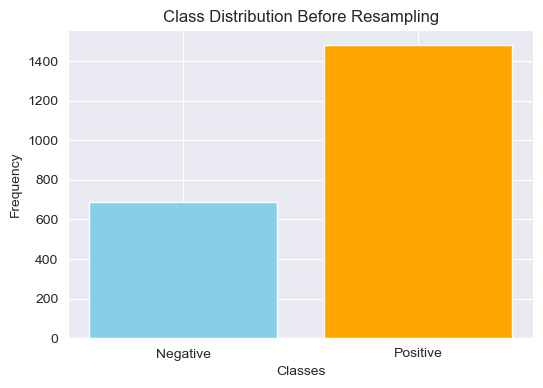

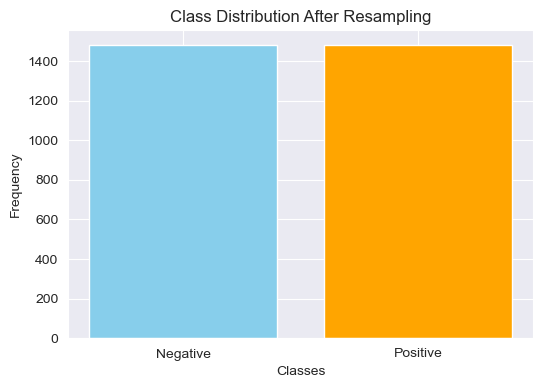

In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

# Convert training text to numerical features (e.g., TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Visualize class distribution before resampling
def plot_class_distribution(y_data, title, labels):
    counts = Counter(y_data)
    plt.figure(figsize=(6, 4))
    plt.bar(counts.keys(), counts.values(), color=['skyblue', 'orange'])
    plt.xticks(ticks=range(len(labels)), labels=labels)
    plt.title(title)
    plt.xlabel('Classes')
    plt.ylabel('Frequency')
    plt.show()

# Plot before resampling
plot_class_distribution(y_train, "Class Distribution Before Resampling", labels=['Negative', 'Positive'])

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Plot after resampling
plot_class_distribution(y_train_resampled, "Class Distribution After Resampling", labels=['Negative', 'Positive'])



# Now we prepare the test data by transforming it using the same vectorizer
this will ensure that the test data is in the same format as the training data

In [34]:
# Transform the test set using the same TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Now we will train the Ml models on the resampled data and evaluate them on the test set
The first model is Logistic Regression and the second one is SVM

# Logistic Regression

Classification Report:
               precision    recall  f1-score   support

    negative       0.74      0.70      0.72       172
    positive       0.87      0.89      0.88       371

    accuracy                           0.83       543
   macro avg       0.80      0.80      0.80       543
weighted avg       0.83      0.83      0.83       543

F1 Score (Weighted): 0.8275
Accuracy: 0.8287


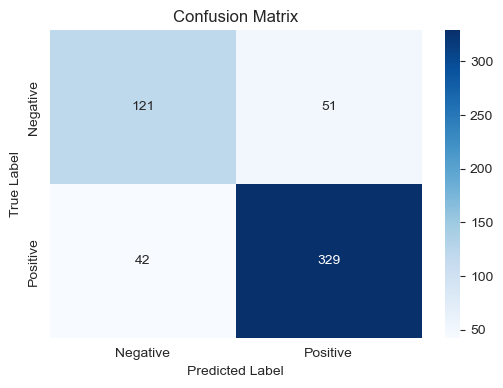

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

# Train a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
f1 = f1_score(y_test, y_pred_lr, average='weighted')
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"F1 Score (Weighted): {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
labels = ['Negative', 'Positive']  # Adjust based on your dataset's class names

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# SVM


Classification Report:
               precision    recall  f1-score   support

    negative       0.75      0.74      0.74       172
    positive       0.88      0.88      0.88       371

    accuracy                           0.84       543
   macro avg       0.81      0.81      0.81       543
weighted avg       0.84      0.84      0.84       543

F1 Score (Weighted): 0.8377
Accuracy: 0.8379


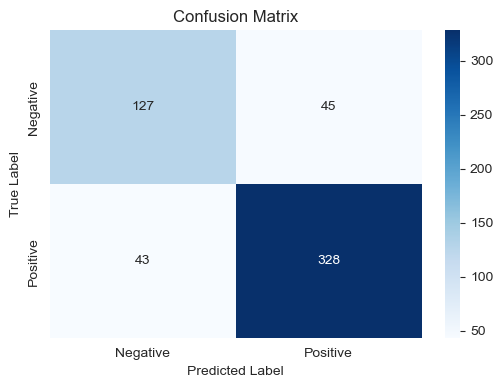

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

# Train an SVM model
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42,probability=True)
svm_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
f1 = f1_score(y_test, y_pred_svm, average='weighted')
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"F1 Score (Weighted): {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
labels = ['Negative', 'Positive']  # Adjust based on your dataset's class names

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# ROC curve for the models and AUC scores for both models to compare their performance


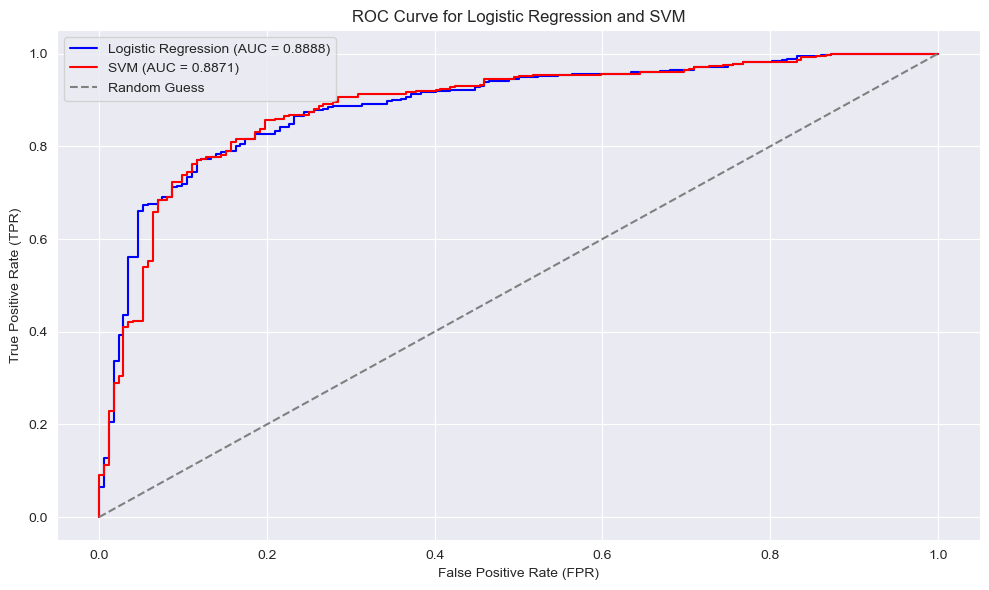

AUC for Logistic Regression: 0.8888
AUC for SVM: 0.8871


In [37]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encode the sentiment labels (positive and negative) into numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # 'positive' to 1 and 'negative' to 0
y_test_encoded = label_encoder.transform(y_test)  # Apply same transformation to test labels

# For Logistic Regression (using lr_model)
y_probs_lr_model = lr_model.predict_proba(X_test_tfidf)  # Probabilities for both classes
y_probs_lr_model_pos = y_probs_lr_model[:, 1]  # Probabilities for positive sentiment (class 1)

# For SVM (ensure you have set probability=True during model initialization)
y_probs_svm = svm_model.predict_proba(X_test_tfidf)  # Probabilities for both classes
y_probs_svm_pos = y_probs_svm[:, 1]  # Probabilities for positive sentiment (class 1)

# Compute ROC curve for Logistic Regression
fpr_lr_model, tpr_lr_model, _ = roc_curve(y_test_encoded, y_probs_lr_model_pos)
# Compute ROC curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test_encoded, y_probs_svm_pos)

# Compute AUC for Logistic Regression
auc_lr_model = roc_auc_score(y_test_encoded, y_probs_lr_model_pos)
# Compute AUC for SVM
auc_svm = roc_auc_score(y_test_encoded, y_probs_svm_pos)

# Plot ROC curve for both models
plt.figure(figsize=(10, 6))

# Plot ROC curve for Logistic Regression
plt.plot(fpr_lr_model, tpr_lr_model, label=f"Logistic Regression (AUC = {auc_lr_model:.4f})", color="blue")

# Plot ROC curve for SVM
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.4f})", color="red")

# Plot diagonal line representing random classifier
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")

plt.title("ROC Curve for Logistic Regression and SVM")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Print AUC Scores for both models
print(f"AUC for Logistic Regression: {auc_lr_model:.4f}")
print(f"AUC for SVM: {auc_svm:.4f}")


# Now we will preprocess the text data and this time we will remove the  Stopwords

In [43]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import html
import string

# Download necessary NLTK resources if not already done
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_and_stem(text):
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', 'url', text)

    # Decode HTML entities
    text = html.unescape(text)

    # Replace stock tickers with 'STOCK'
    text = re.sub(r'\$[A-Za-z]+', 'STOCK', text)

    # Handle cases with currencies like USD, EUR, GBP, etc.
    text = re.sub(r'(\b(?:USD|EUR|GBP|INR|JPY|CAD|AUD|CHF|CNY|ZAR|SEK|NOK|¥|€|₹|£))\s?(\d+(\,?\d{3})*(\.\d{1,2})?)', r'\1\2', text)

    # Remove space between digits and decimal points
    text = re.sub(r'(\d)\s?\.(\d)', r'\1.\2', text)  # For cases like 1 .6 -> 1.6

    # Remove space before or after a comma in large numbers like EUR1 ,000
    text = re.sub(r'(\d)\s?,(\d)', r'\1,\2', text)  # For cases like EUR1 ,000 -> EUR1,000

    # Ensure that numbers with units (e.g., EUR 1.6 m) have no spaces
    text = re.sub(r'(\d)\s?(billion|million|bn|mn|mln)', r'\1\2', text,flags=re.IGNORECASE)

    pattern = r"(?:(?:[\$\€\¥\£])\s?\d+(?:,\d{3})*(?:\.\d+)?(?:\s?(?:[kK]|[mM]illion|[bB]illion|[tT]housand|[mM][nNlL]?|[bB][nN]?)?)?)"
    text = re.sub(pattern, r"value ", text)  # Add a space after "money_value"

    pattern2 = r"(?:USD|EUR|GBP|JPY|AUD|CAD)\s?\d+(?:,\d{3})*(?:\.\d+)?(?:\s?(?:[kK]|[mM]illion|[bB]illion|[tT]housand|[mM][nNlL]?|[bB][nN]?)?)"
    text = re.sub(pattern2, r"value ", text)  # Add a space after "money_value"

    # Replace percentages
    text = re.sub(r'\d+(\.\d+)?\s?%|(\d+(\.\d+)?\s?percent)', 'percentage', text, flags=re.IGNORECASE)
    # Replace months, dates, years, and hours
    text = re.sub(r'\b(Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)\b', 'month', text)
    text = re.sub(r'\b\d{4}\b', 'year', text)
    text = re.sub(r'\b\d{1,2}(st|nd|rd|th)\b', 'date', text)
    text = re.sub(r'\b\d{1,2}[:]\d{2}\b', 'hour', text)

    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    # Tokenize and clean up text
    tokens = word_tokenize(text.lower())

    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]

    # Use custom stopwords
    custom_stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in custom_stop_words]

     # Apply lemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into text
    return ' '.join(lemmatized_tokens)

# Apply the cleaning function to the 'Sentence' column and create a new column 'cleaned_text'
df['cleaned_text'] = df['Sentence'].apply(clean_and_stem)
df.head(100)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mateo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mateo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mateo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Sentence,Sentiment,text_length,cleaned_text
0,The GeoSolutions technology will leverage Bene...,positive,218,geosolutions technology leverage benefon gps s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,55,stock low value value k real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,193,last quarter year componenta net sale doubled ...
3,$SPY wouldn't be surprised to see a green close,positive,47,stock wouldnt surprised see green close
4,Shell's $70 Billion BG Deal Meets Shareholder ...,negative,56,shell value bg deal meet shareholder skepticism
...,...,...,...,...
95,The pretax profit of the group 's life insuran...,positive,91,pretax profit group life insurance business in...
96,RT @alphatrends VMarkets Are Still Acting Weak...,negative,92,rt alphatrends vmarkets still acting weak url ...
97,One of the installed elevators will be a doubl...,positive,128,one installed elevator doubledeck elevator ena...
98,Just went long $ILMN,positive,20,went long stock


## Split the data into training and testing sets and resample the training data

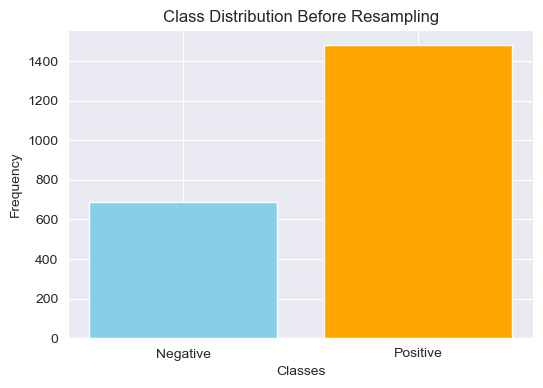

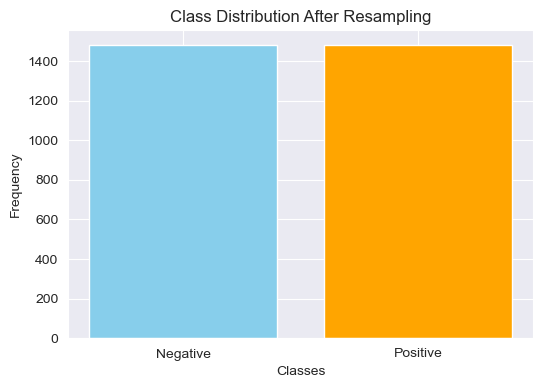

In [39]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from sklearn.model_selection import train_test_split

# Assuming your dataset has 'cleaned_text' and 'sentiment' columns
X = df['cleaned_text']
y = df['Sentiment']

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Convert training text to numerical features (e.g., TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Visualize class distribution before resampling
def plot_class_distribution(y_data, title, labels):
    counts = Counter(y_data)
    plt.figure(figsize=(6, 4))
    plt.bar(counts.keys(), counts.values(), color=['skyblue', 'orange'])
    plt.xticks(ticks=range(len(labels)), labels=labels)
    plt.title(title)
    plt.xlabel('Classes')
    plt.ylabel('Frequency')
    plt.show()

# Plot before resampling
plot_class_distribution(y_train, "Class Distribution Before Resampling", labels=['Negative', 'Positive'])

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Plot after resampling
plot_class_distribution(y_train_resampled, "Class Distribution After Resampling", labels=['Negative', 'Positive'])

# Transform the test set using the same TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# And we train and validate the models
The first model is Logistic Regression and the second one is SVM as we did before

Classification Report:
               precision    recall  f1-score   support

    negative       0.69      0.69      0.69       172
    positive       0.86      0.85      0.86       371

    accuracy                           0.80       543
   macro avg       0.77      0.77      0.77       543
weighted avg       0.80      0.80      0.80       543

F1 Score (Weighted): 0.8031
Accuracy: 0.8029


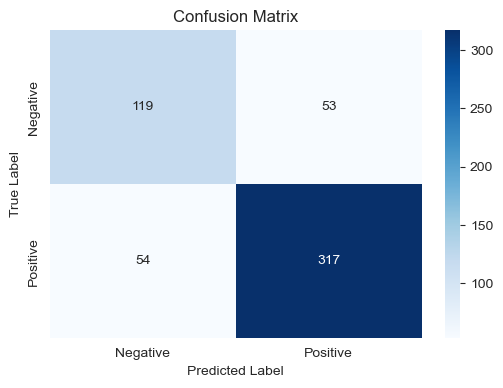

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

# Train a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
f1 = f1_score(y_test, y_pred_lr, average='weighted')
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"F1 Score (Weighted): {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
labels = ['Negative', 'Positive']  # Adjust based on your dataset's class names

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Classification Report:
               precision    recall  f1-score   support

    negative       0.67      0.73      0.70       172
    positive       0.87      0.84      0.85       371

    accuracy                           0.80       543
   macro avg       0.77      0.78      0.77       543
weighted avg       0.81      0.80      0.80       543

F1 Score (Weighted): 0.8031
Accuracy: 0.8011


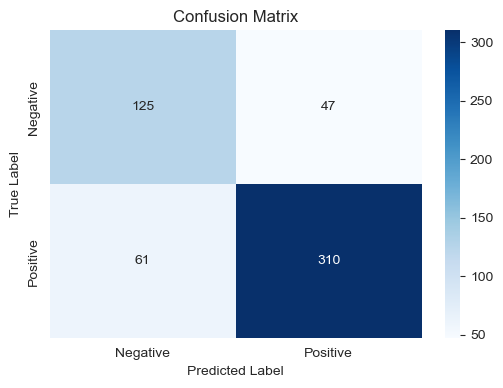

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

# Train an SVM model
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42,probability=True)
svm_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
f1 = f1_score(y_test, y_pred_svm, average='weighted')
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"F1 Score (Weighted): {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
labels = ['Negative', 'Positive']  # Adjust based on your dataset's class names

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# ROC curve for the models and AUC scores for both models to compare their performance

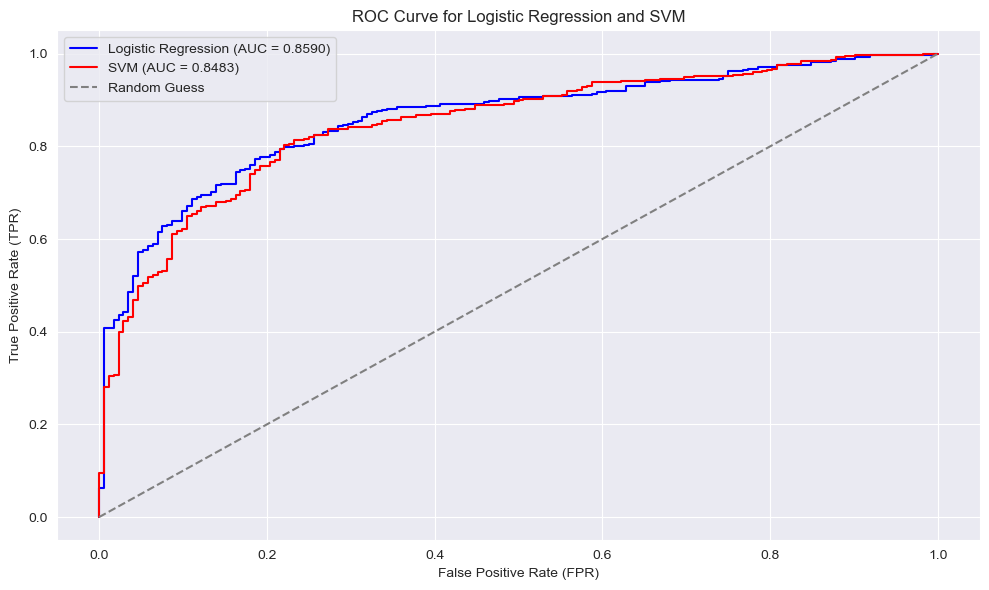

AUC for Logistic Regression: 0.8590
AUC for SVM: 0.8483


In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encode the sentiment labels (positive and negative) into numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # 'positive' to 1 and 'negative' to 0
y_test_encoded = label_encoder.transform(y_test)  # Apply same transformation to test labels

# For Logistic Regression (using lr_model)
y_probs_lr_model = lr_model.predict_proba(X_test_tfidf)  # Probabilities for both classes
y_probs_lr_model_pos = y_probs_lr_model[:, 1]  # Probabilities for positive sentiment (class 1)

# For SVM (ensure you have set probability=True during model initialization)
y_probs_svm = svm_model.predict_proba(X_test_tfidf)  # Probabilities for both classes
y_probs_svm_pos = y_probs_svm[:, 1]  # Probabilities for positive sentiment (class 1)

# Compute ROC curve for Logistic Regression
fpr_lr_model, tpr_lr_model, _ = roc_curve(y_test_encoded, y_probs_lr_model_pos)
# Compute ROC curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test_encoded, y_probs_svm_pos)

# Compute AUC for Logistic Regression
auc_lr_model = roc_auc_score(y_test_encoded, y_probs_lr_model_pos)
# Compute AUC for SVM
auc_svm = roc_auc_score(y_test_encoded, y_probs_svm_pos)

# Plot ROC curve for both models
plt.figure(figsize=(10, 6))

# Plot ROC curve for Logistic Regression
plt.plot(fpr_lr_model, tpr_lr_model, label=f"Logistic Regression (AUC = {auc_lr_model:.4f})", color="blue")

# Plot ROC curve for SVM
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.4f})", color="red")

# Plot diagonal line representing random classifier
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")

plt.title("ROC Curve for Logistic Regression and SVM")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Print AUC Scores for both models
print(f"AUC for Logistic Regression: {auc_lr_model:.4f}")
print(f"AUC for SVM: {auc_svm:.4f}")
